In [1]:
from constants import *
from data.load_data import load_arff_file_from_file_path
from clustering_algorithms.kmeans import calculate_wcss
from main import plot_clusters as plot_clustering

# We want to just test the clustering on a single dataset
# Choose the diamond9 dataset

def test_clustering(
    dataset_name,
    clustering_algorithm,
    approximate_adder_name,
    n_clusters,
    bit_configuration = (32, 8),
    initialisation_random_state = 26,
    maximum_iterations = 20,
    plot_clusters = False
):
    # We first load the dataset
    dataset = load_arff_file_from_file_path(DATASETS[dataset_name]['path'])
    
    # We then load the clustering algorithm
    clustering_function = CLUSTERING_ALGORITHMS[clustering_algorithm]['algorithm']
    # The clustering function has parameters (X, k, max_iters=100,  random_state=26, adder=accurate_adder, bits=(32, 4))
    # We then load the approximate adder
    adder = APPROXIMATE_ADDERS[approximate_adder_name]['adder']
    # The adder has parameters (num1, num2, total_bits, inaccurate_bits)
       
    # We then initialize the results dictionary
    
    clusters, centroids, converged = clustering_function(dataset, n_clusters, max_iters=maximum_iterations, adder=adder, random_state=initialisation_random_state, bits=bit_configuration)
    WCSS = calculate_wcss(dataset, clusters, centroids)
    
    if plot_clusters:
        plot_clustering(dataset, clusters, centroids)
    
    return WCSS, converged

['accurate_adder', 'LOA', 'LOAWA', 'APPROX5', 'HEAA', 'M_HEAA', 'OLOCA', 'HOERAA', 'CEETA', 'HOAANED', 'HERLOA', 'M_HERLOA', 'COREA', 'SAAR', 'BPAA', 'DBAA', 'NAA', 'M_SAAR', 'BPAA_LSP1']



(1015.3201867314164, True)

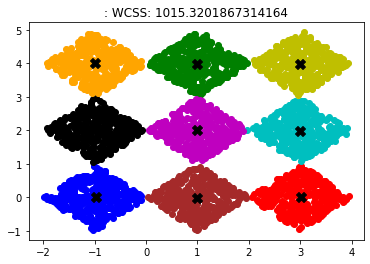

In [6]:
test_clustering('diamond9', 'KMeans++_with_adder_mod', 'BPAA_LSP1', 9, bit_configuration=(16,5), plot_clusters=True)